In [1]:
import numpy as np
from matplotlib import pyplot as plt
import jax.numpy as jnp
from jax import jit, grad, jacfwd, jacrev

In [2]:
def f(x):
    return x**4 + x**3 - x**2 - x

def grad_f(x):
    return 4 * x**3 + 3 * x**2 - 2 * x - 1

def hess_f(x):
    return 12 * x**2 + 6 * x - 2

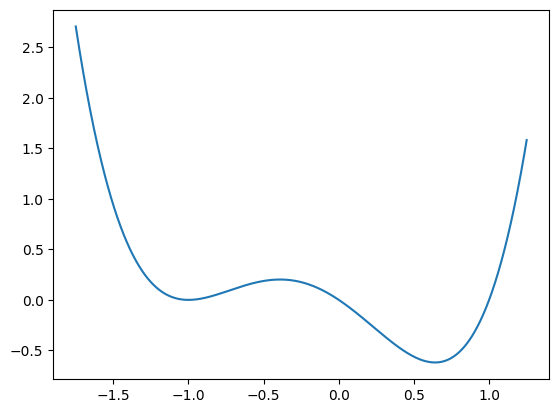

In [3]:
x = np.linspace(-1.75,1.25,1000)
plt.plot(x, f(x))

In [4]:
def newton_step(x):
    if x.ndim == 1:
        inv_hess = 1/hess_f(x)
    else:
        inv_hess = np.linalg.inv(hess_f(x))
    # print(inv_hess, grad_f(x))
    dx = - inv_hess * grad_f(x)
    return x + dx

## Case 1. (x = 1.0)

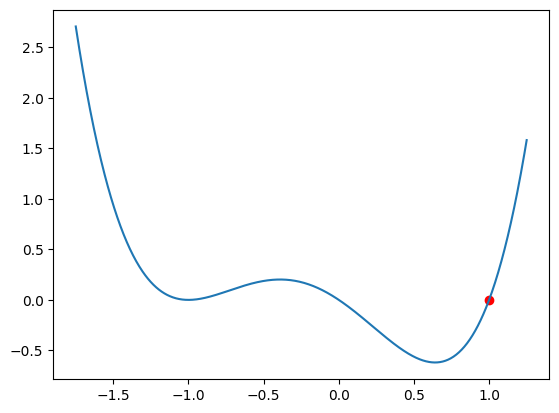

In [5]:
x_guess = np.array([1.0])
plt.plot(x, f(x))
plt.scatter(x_guess, f(x_guess), color='r')

[1.         0.75       0.65540541 0.64073202 0.64038839]


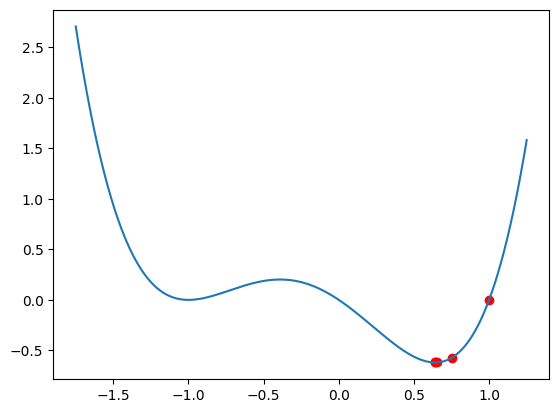

In [9]:
x_guess = np.append(x_guess, newton_step(np.array([x_guess[-1]])))
print(x_guess)
plt.plot(x, f(x))
plt.scatter(x_guess, f(x_guess), color='r')

## Case 2. (x = -1.3)

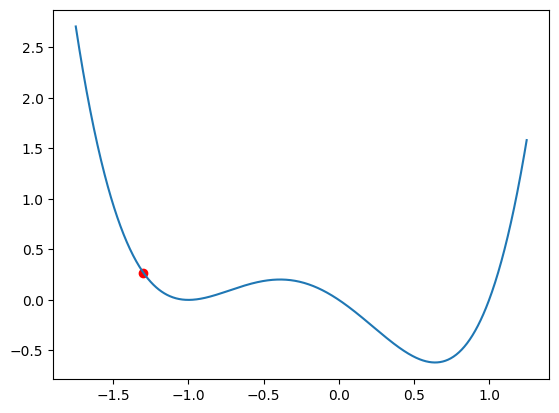

In [10]:
x_guess = np.array([-1.3])
plt.plot(x, f(x))
plt.scatter(x_guess, f(x_guess), color='r')

[-1.3        -1.09790076 -1.01595441 -1.00054155 -1.00000066]


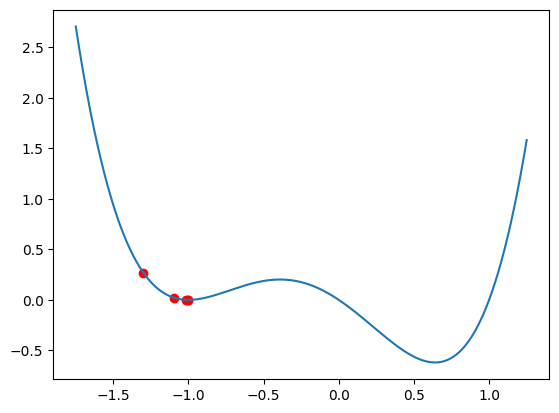

In [14]:
x_guess = np.append(x_guess, newton_step(np.array([x_guess[-1]])))
print(x_guess)
plt.plot(x, f(x))
plt.scatter(x_guess, f(x_guess), color='r')

## Case 3. (x = 0.0, Exception Case) 

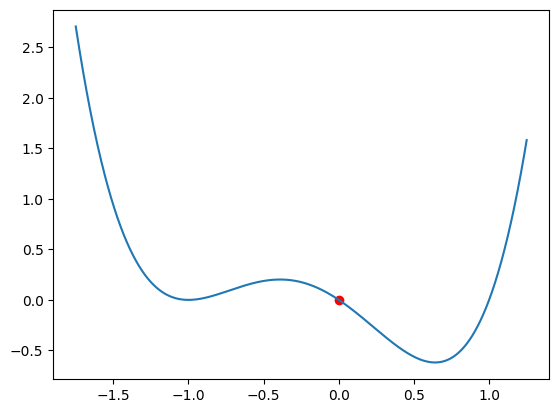

In [15]:
x_guess = np.array([0.0])
plt.plot(x, f(x))
plt.scatter(x_guess, f(x_guess), color='r')

[ 0.         -0.5        -0.375      -0.3902439  -0.39038819 -0.3903882
 -0.3903882  -0.3903882 ]


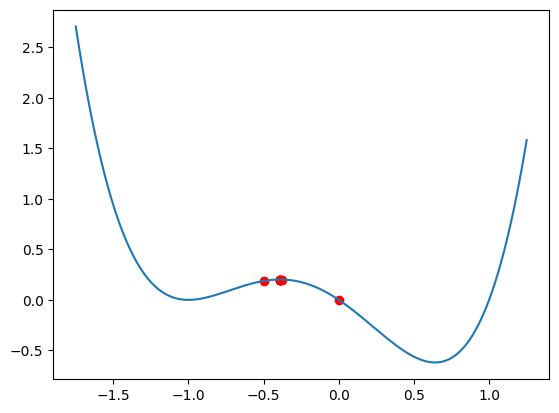

In [22]:
x_guess = np.append(x_guess, newton_step(np.array([x_guess[-1]])))
print(x_guess)
plt.plot(x, f(x))
plt.scatter(x_guess, f(x_guess), color='r')

## Check Hessians of three cases

In [24]:
case1 = np.array([1.0])
case2 = np.array([-1.3])
case3 = np.array([0.0])

hess_f(case1), hess_f(case2), hess_f(case3)

(array([16.]), array([10.48]), array([-2.]))

## Regularization

In [28]:
def regularized_newton_step(x, beta):

    H = hess_f(x)

    if H.ndim == 1:
        while H <= 0:
            H += beta
        dx = -(1/H) * grad_f(x)
    else:
        while not np.all(np.linalg.eigvals(x) > 0):
            H += beta * np.identity(H.ndim)
        dx = -np.linalg.inv(H) * grad_f(x)

    return x + dx

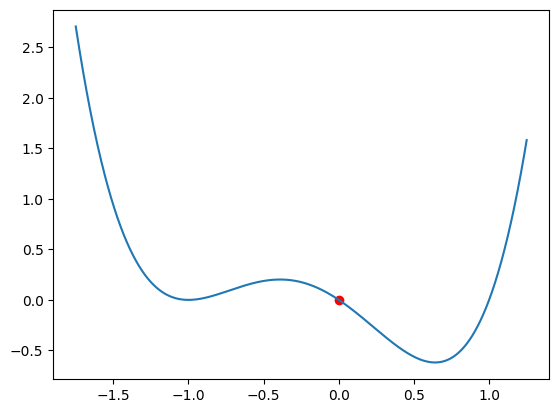

In [29]:
x_guess = np.array([0.0])
plt.plot(x, f(x))
plt.scatter(x_guess, f(x_guess), color='r')

[0.         1.         0.75       0.65540541 0.64073202 0.64038839
 0.6403882  0.6403882 ]


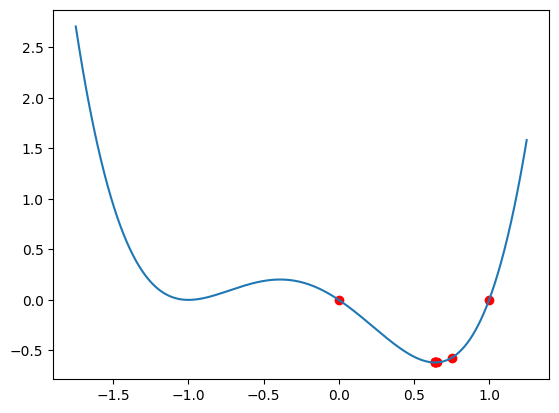

In [37]:
beta = 1.0
x_guess = np.append(x_guess, regularized_newton_step(np.array([x_guess[-1]]), beta))
print(x_guess)
plt.plot(x, f(x))
plt.scatter(x_guess, f(x_guess), color='r')

In [39]:
def regularization_only(x, beta):

    H = hess_f(x)

    if H.ndim == 1:
        while H <= 0:
            print(H)
            H += beta
    else:
        while not np.all(np.linalg.eigvals(x) > 0):
            print(H)
            H += beta * np.identity(H.ndim)
        
    return H

In [40]:
x_guess = np.array([0.0])
beta = 1.0
regularization_only(x_guess, beta)

[-2.]
[-1.]
[0.]


array([1.])

## Line-Search (for preventing overshooting)

In [41]:
def backtracking_regularized_newton_step(x, beta, alpha, b, c):

    H = hess_f(x)

    if H.ndim == 1:
        while H <= 0:
            H += beta
        dx = -(1/H) * grad_f(x)
    else:
        while not np.all(np.linalg.eigvals(x) > 0):
            H += beta * np.identity(H.ndim)
        dx = -np.linalg.inv(H) * grad_f(x)

    while f(x + alpha * dx ) > b * alpha * grad_f(x) * dx:
        alpha = c * alpha

    return x + alpha * dx

In [51]:
x_guess = np.array([0.1])
beta = 1.0
alpha = 1.0
b = 0.1
c = 0.5

backtracking_regularized_newton_step(x_guess, beta, alpha, b, c)

array([0.90972222])

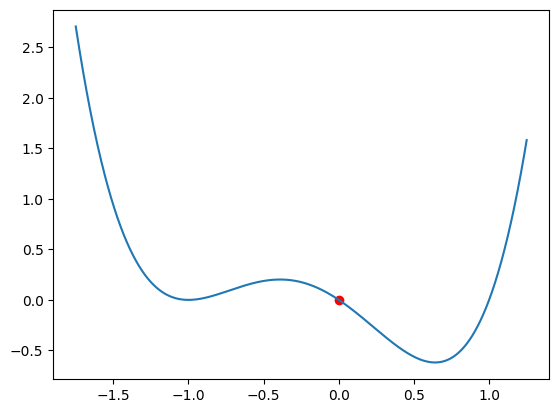

In [55]:
x_guess = np.array([0.0])
plt.plot(x, f(x))
plt.scatter(x_guess, f(x_guess), color='r')

[0.         0.5        0.6875     0.64353707 0.64040375 0.6403882
 0.6403882 ]


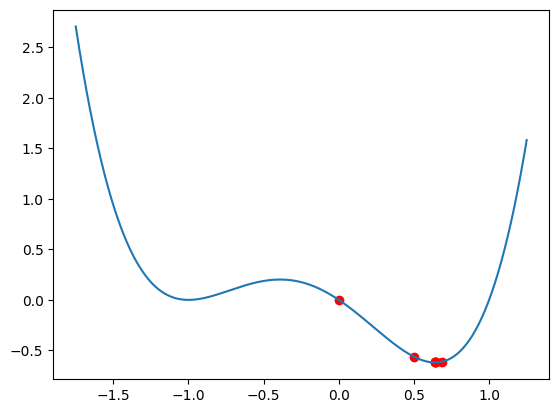

In [61]:
x_guess = np.append(x_guess, backtracking_regularized_newton_step(np.array([x_guess[-1]]), beta, alpha, b, c))
print(x_guess)
plt.plot(x, f(x))
plt.scatter(x_guess, f(x_guess), color='r')